In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


In [2]:
X, y = load_boston().data, load_boston().target.reshape(-1,1)

In [3]:
X.shape, y.shape

((506, 13), (506, 1))

In [30]:
class nn_regression(object):
    def __init__(self, eta = 0.005, iterations = 1000, layer_dims = [13,50,50,1], epsilon = 0.01):
        self.eta = eta
        self.iterations = iterations
        self.layer_dims = layer_dims
        self.layers = len(layer_dims)
        self.epsilon = epsilon
        
    def fit(self,X,y):
        X_ = X.T
        y_ = y.T
        A0 = X_
        cost_ = []
        parameters = {}
        derivatives = {}
        m_ = len(y_)
        
        for l in range(1,self.layers):
            parameters['W'+str(l)] = np.random.randn(self.layer_dims[l],self.layer_dims[l-1]) * self.epsilon
            parameters['b'+str(l)] = np.zeros((self.layer_dims[l],1))
            
            
        i = 1
        while(i != self.iterations):
            #frw.prop
            Z1 = np.dot(parameters['W1'],A0) + parameters['b1']
            A1 = self.sigmoid(Z1)
            Z2 = np.dot(parameters['W2'],A1) + parameters['b2']
            A2 = self.sigmoid(Z2)
            Z3 = np.dot(parameters['W3'],A2) + parameters['b3']
            A3 = Z3
            ## cost
            cost = self.mae(y_,A3,m_)
            cost_.append(cost)
            # derivatives
            dZ3 = A3 - y_
            dW3 = (1/m_)*np.dot(dZ3,A2.T) 
            db3 = (1/m_)*np.sum(dZ3, axis = 1 , keepdims= True)
            dZ2 = np.dot(parameters['W3'].T,dZ3) * (A2 * (1- A2))
            dW2 = (1/m_)*np.dot(dZ2,A1.T) 
            db2 = (1/m_)*np.sum(dZ2, axis = 1 , keepdims= True)
            dZ1 = np.dot(parameters['W2'].T,dZ2) * (A1 * (1- A1))
            dW1 = (1/m_)*np.dot(dZ1,A0.T) 
            db1 = (1/m_)*np.sum(dZ1, axis = 1 , keepdims= True)
            #updates
            parameters['W3'] -= self.eta * dW3
            parameters['b3'] -= self.eta * db3
            parameters['W2'] -= self.eta * dW2
            parameters['b2'] -= self.eta * db2
            parameters['W1'] -= self.eta * dW1
            parameters['b1'] -= self.eta * db1
            #print
            if i % 100 ==0:
                print(f'epoch:{i} cost:{cost}')
            if i == 1000:
                history = pd.DataFrame(cost_, columns =['cost'])
                plt.figure(figsize =(14,4))
                plt.subplot(1,2,1)
                plt.plot(history.cost[:1000], 'b')
                plt.plot(history.cost[1000:], 'r')
                plt.show()
                q1 = input('do you wanna change learning rate) y/n')
                if q1.lower() == 'y':
                    self.eta = float(input('please insert new learning rate'))
            i += 1
        history = pd.DataFrame(cost_, columns=['cost'])
        plt.figure(figsize =(14,4))
        plt.subplot(1,2,1)
        plt.plot(history.cost[:1000], 'b')
        plt.plot(history.cost[1000:], 'r')
        plt.subplot(1,2,2)
        plt.plot(history.cost[1000:], 'g')
        plt.show()
        return parameters
    
    def sigmoid(self,z):
        return 1/ (1+ np.exp(-z))
    
    def mae(self,y_true,y_pred,m_):
        return np.sum(np.abs(y_true - y_pred))/m_

<ipython-input-30-99a9ca92c7c2>:77: RuntimeWarning: overflow encountered in exp
  return 1/ (1+ np.exp(-z))


epoch:100 cost:3280.8738063368137
epoch:200 cost:3249.5076367625174
epoch:300 cost:3211.308451542173
epoch:400 cost:3187.6754303648204
epoch:500 cost:3176.745608322913
epoch:600 cost:3173.521912317384
epoch:700 cost:3178.96219487484
epoch:800 cost:3173.053184075164
epoch:900 cost:3173.9274831872754
epoch:1000 cost:3174.6484696751477


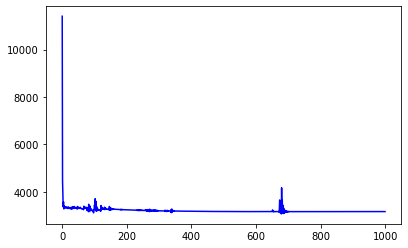

do you wanna change learning rate) y/ny
please insert new learning rate0.00001
epoch:1100 cost:3174.7670449398397
epoch:1200 cost:3174.8706505178634
epoch:1300 cost:3174.966318984099
epoch:1400 cost:3175.0546735239423
epoch:1500 cost:3175.136274724401
epoch:1600 cost:3175.211598073173
epoch:1700 cost:3175.2807673480056
epoch:1800 cost:3170.8624876849517
epoch:1900 cost:3075.1738133822532


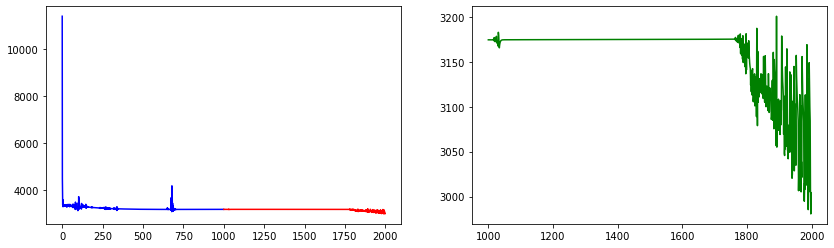

In [31]:
parameters = nn_regression(eta = 0.00005, iterations= 2000, epsilon= 0.01 , layer_dims = [13,100,100,1]).fit(X,y)